In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd. read_csv('Drug.csv')
data

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,0.848774,0.073380,drugC
196,16,M,LOW,HIGH,0.743021,0.061886,drugC
197,52,M,NORMAL,HIGH,0.549945,0.055581,drugX
198,23,M,NORMAL,NORMAL,0.784520,0.055959,drugX


In [3]:
df = pd.DataFrame (data)
df

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,0.848774,0.073380,drugC
196,16,M,LOW,HIGH,0.743021,0.061886,drugC
197,52,M,NORMAL,HIGH,0.549945,0.055581,drugX
198,23,M,NORMAL,NORMAL,0.784520,0.055959,drugX


In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Age Sex      BP Cholesterol        Na         K   Drug
0   23   F    HIGH        HIGH  0.792535  0.031258  drugY
1   47   M     LOW        HIGH  0.739309  0.056468  drugC
2   47   M     LOW        HIGH  0.697269  0.068944  drugC
3   28   F  NORMAL        HIGH  0.563682  0.072289  drugX
4   61   F     LOW        HIGH  0.559294  0.030998  drugY


In [5]:
# Display basic information about the dataset
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB
None


In [6]:
# Descriptive statistics for quantitative features
quantitative_stats = data.describe()
print("Descriptive statistics for quantitative features:")
print(quantitative_stats)

# Frequency table for categorical features
categorical_features = ['Sex', 'BP', 'Cholesterol', 'Drug']

for feature in categorical_features:
    print("\nFrequency table for", feature, ":")
    freq_table = data[feature].value_counts()
    freq_table_percentage = data[feature].value_counts(normalize=True) * 100
    freq_table_combined = pd.concat([freq_table, freq_table_percentage], axis=1)
    freq_table_combined.columns = ['Count', 'Percentage']
    print(freq_table_combined)

Descriptive statistics for quantitative features:
              Age          Na           K
count  200.000000  200.000000  200.000000
mean    44.315000    0.697095    0.050174
std     16.544315    0.118907    0.017611
min     15.000000    0.500169    0.020022
25%     31.000000    0.583887    0.035054
50%     45.000000    0.721853    0.049663
75%     58.000000    0.801494    0.066000
max     74.000000    0.896056    0.079788

Frequency table for Sex :
     Count  Percentage
Sex                   
M      104        52.0
F       96        48.0

Frequency table for BP :
        Count  Percentage
BP                       
HIGH       77        38.5
LOW        64        32.0
NORMAL     59        29.5

Frequency table for Cholesterol :
             Count  Percentage
Cholesterol                   
HIGH           103        51.5
NORMAL          97        48.5

Frequency table for Drug :
       Count  Percentage
Drug                    
drugY     91        45.5
drugX     54        27.0
drugA     

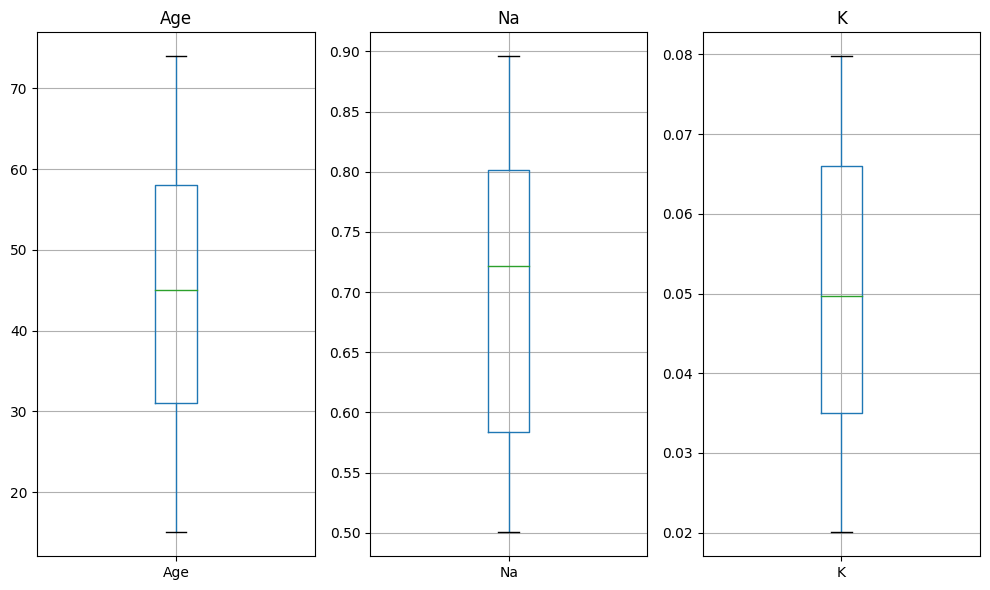

In [7]:
# Selecting only quantitative features
quantitative_features = ['Age', 'Na', 'K']

# Method 1: Visual Inspection - Box Plot Analysis
import matplotlib.pyplot as plt

def box_plot_analysis(data, features):
    plt.figure(figsize=(10, 6))
    for i, feature in enumerate(features, start=1):
        plt.subplot(1, len(features), i)
        data.boxplot(column=feature)
        plt.title(feature)
    plt.tight_layout()
    plt.show()

box_plot_analysis(data, quantitative_features)

In [8]:

# Method 2: Summary Statistics
def summary_statistics(data, features):
    return data[features].describe()

print("Summary Statistics:")
print(summary_statistics(data, quantitative_features))

Summary Statistics:
              Age          Na           K
count  200.000000  200.000000  200.000000
mean    44.315000    0.697095    0.050174
std     16.544315    0.118907    0.017611
min     15.000000    0.500169    0.020022
25%     31.000000    0.583887    0.035054
50%     45.000000    0.721853    0.049663
75%     58.000000    0.801494    0.066000
max     74.000000    0.896056    0.079788


In [9]:
# Method 3: Z-Score Method for Outlier Detection
def detect_outliers_zscore(data, features, threshold=3):
    outliers = pd.DataFrame()
    for feature in features:
        z_scores = (data[feature] - data[feature].mean()) / data[feature].std()
        outliers[feature] = data[feature][abs(z_scores) > threshold]
    return outliers

outliers_zscore = detect_outliers_zscore(data, quantitative_features)
print("\nOutliers detected using Z-score method:")
print(outliers_zscore)


Outliers detected using Z-score method:
Empty DataFrame
Columns: [Age, Na, K]
Index: []


In [10]:
# Method 4: Interquartile Range (IQR) Method for Outlier Detection
def detect_outliers_iqr(data, features):
    outliers = pd.DataFrame()
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = data[feature][(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

outliers_iqr = detect_outliers_iqr(data, quantitative_features)
print("\nOutliers detected using IQR method:")
print(outliers_iqr)


Outliers detected using IQR method:
Empty DataFrame
Columns: [Age, Na, K]
Index: []


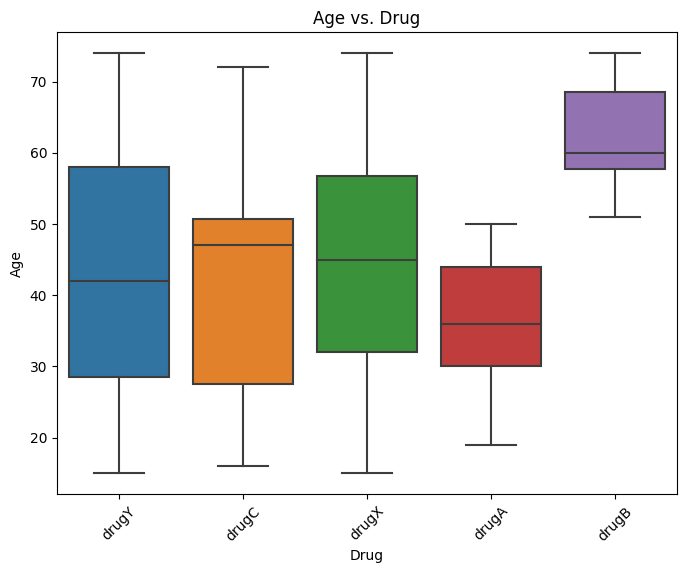

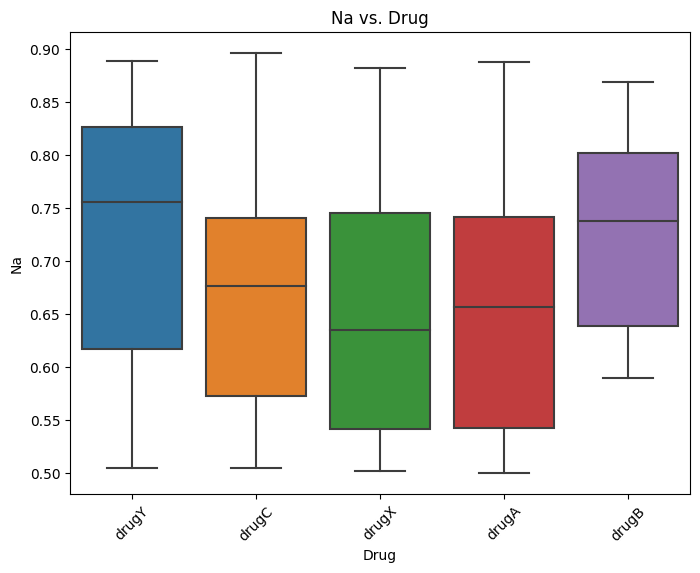

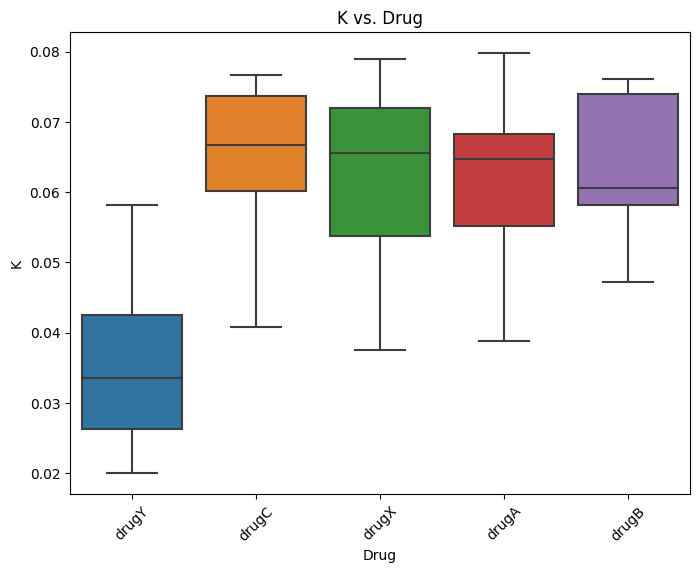

In [11]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting box plots for each quantitative feature vs. the target variable
for feature in quantitative_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Drug', y=feature, data=data)
    plt.title(f'{feature} vs. Drug')
    plt.xlabel('Drug')
    plt.ylabel(feature)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


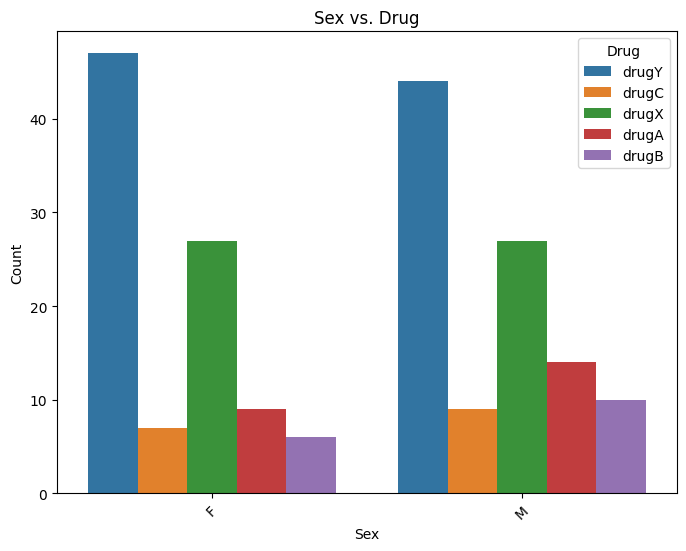

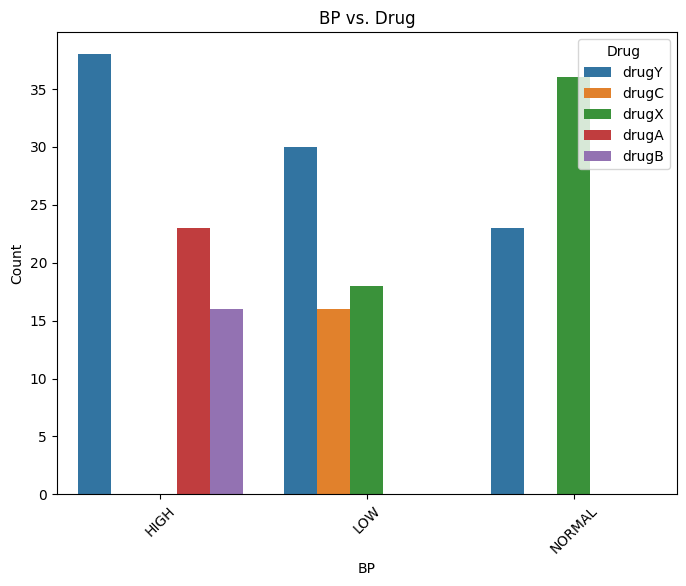

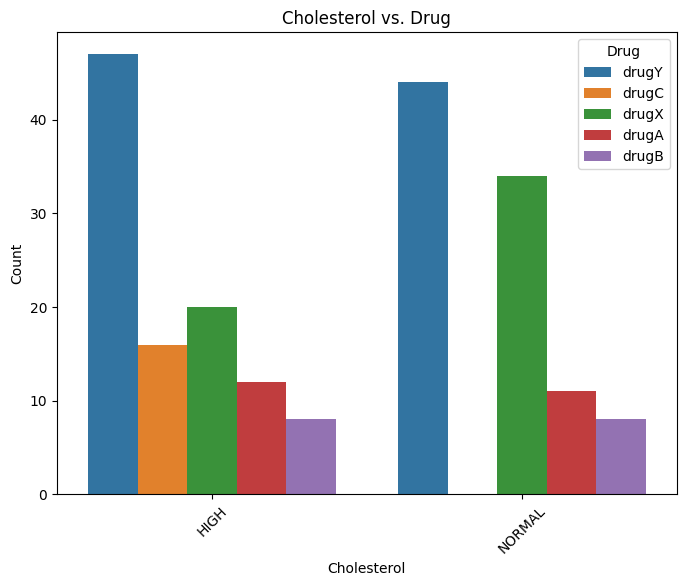

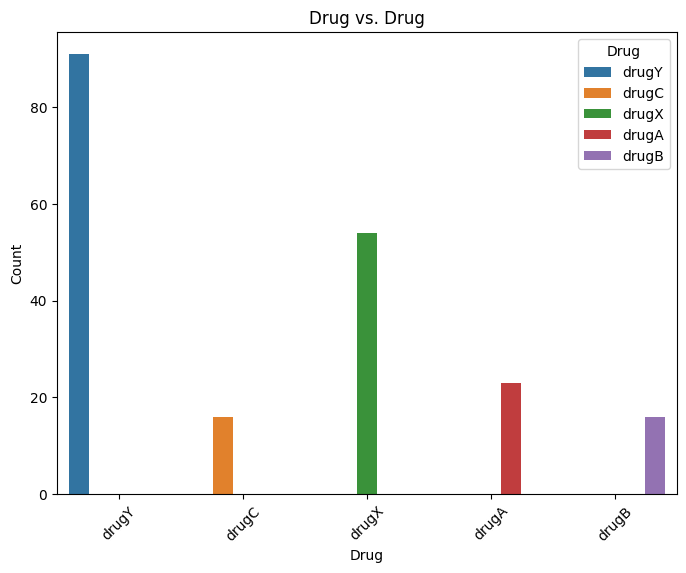

In [12]:
# Plotting count plots for each categorical feature vs. the target variable
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Drug', data=data)
    plt.title(f'{feature} vs. Drug')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Drug', loc='upper right')
    plt.show()


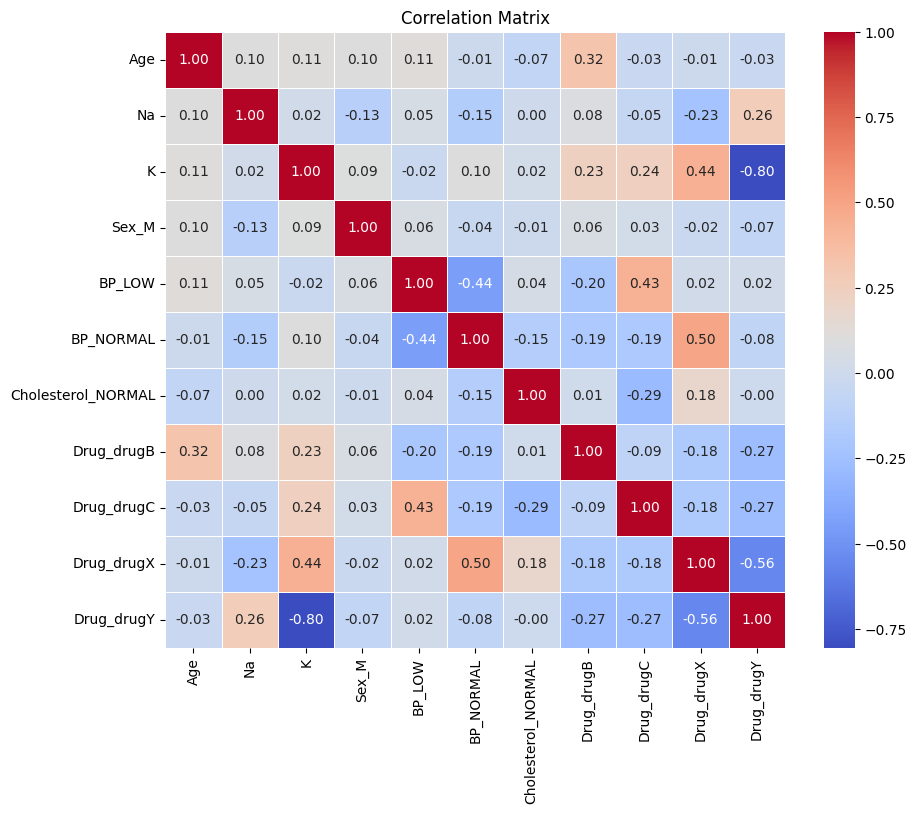

In [13]:
# Encode categorical features
encoded_data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Calculate correlation matrix
correlation_matrix = encoded_data.corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



In [14]:
from scipy.stats import pearsonr

# Selecting numerical features
numerical_features = ['Na', 'K', 'Age']

# Calculate Pearson's correlation coefficient and p-value for each pair of numerical features
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        feature1 = numerical_features[i]
        feature2 = numerical_features[j]
        correlation_coefficient, p_value = pearsonr(data[feature1], data[feature2])
        print(f"Correlation between {feature1} and {feature2}:")
        print(f"Pearson's correlation coefficient: {correlation_coefficient}")
        print(f"P-value: {p_value}")
        if p_value < 0.05:
            print("Statistically significant correlation\n")
        else:
            print("No statistically significant correlation\n")


Correlation between Na and K:
Pearson's correlation coefficient: 0.017334587466501242
P-value: 0.807517550562758
No statistically significant correlation

Correlation between Na and Age:
Pearson's correlation coefficient: 0.10037117622299323
P-value: 0.1573210424111357
No statistically significant correlation

Correlation between K and Age:
Pearson's correlation coefficient: 0.11149123744762576
P-value: 0.11600960745090848
No statistically significant correlation



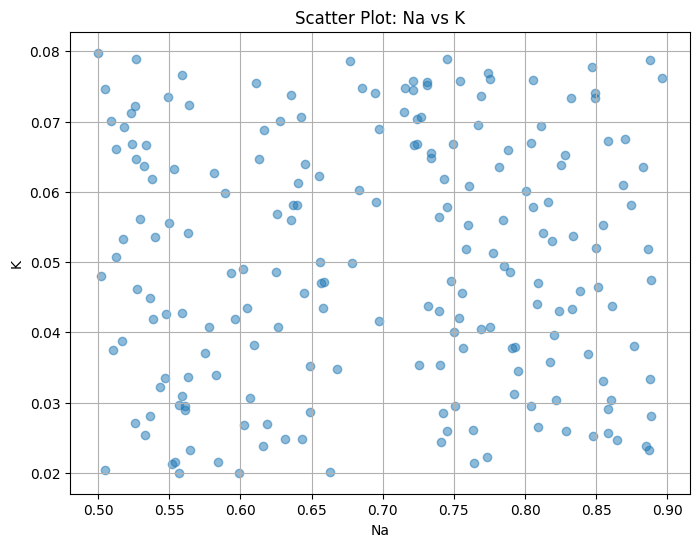

In [15]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Plotting scatter plot between Na and K
plt.figure(figsize=(8, 6))
plt.scatter(data['Na'], data['K'], alpha=0.5)
plt.title('Scatter Plot: Na vs K')
plt.xlabel('Na')
plt.ylabel('K')
plt.grid(True)
plt.show()


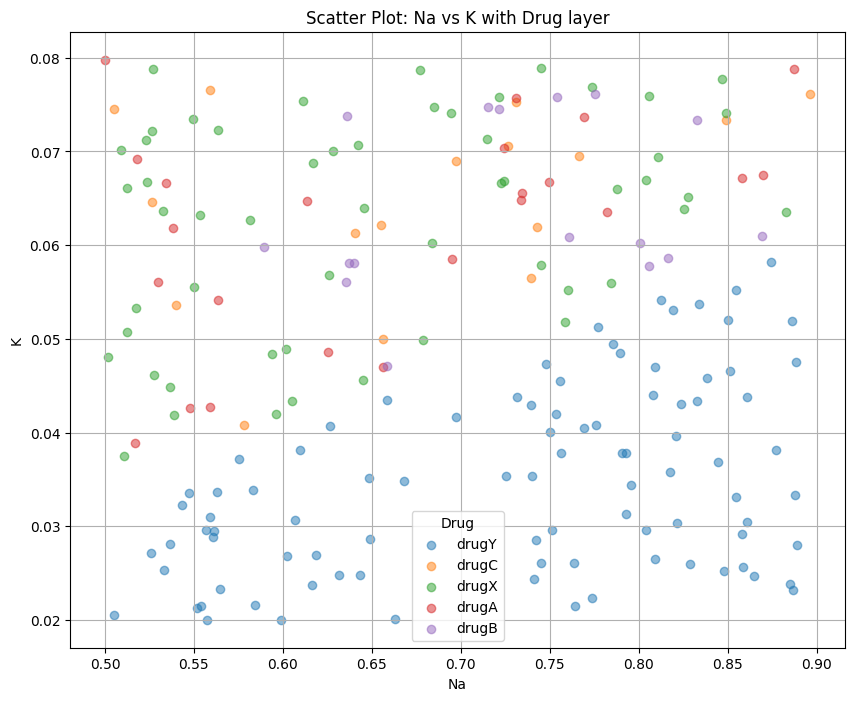

In [16]:
# Plotting scatter plot between Na and K with Drug layer in color code
plt.figure(figsize=(10, 8))
for drug_category in data['Drug'].unique():
    plt.scatter(data[data['Drug'] == drug_category]['Na'], 
                data[data['Drug'] == drug_category]['K'], 
                alpha=0.5, label=drug_category)

plt.title('Scatter Plot: Na vs K with Drug layer')
plt.xlabel('Na')
plt.ylabel('K')
plt.legend(title='Drug')
plt.grid(True)
plt.show()


In [17]:
from scipy.stats import chi2_contingency

# Contingency table between Drug and Sex
contingency_table = pd.crosstab(data['Drug'], data['Sex'])

# Performing chi-square test for independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-square statistic: 2.119248418109203
P-value: 0.7138369773987128
Degrees of freedom: 4
Expected frequencies table:
[[11.04 11.96]
 [ 7.68  8.32]
 [ 7.68  8.32]
 [25.92 28.08]
 [43.68 47.32]]


In [18]:
# Create the Na/K ratio index and add it to the data
data['Na_K_Ratio'] = data['Na'] / data['K']

# Display the first few rows of the updated data
print(data.head())


   Age Sex      BP Cholesterol        Na         K   Drug  Na_K_Ratio
0   23   F    HIGH        HIGH  0.792535  0.031258  drugY   25.354629
1   47   M     LOW        HIGH  0.739309  0.056468  drugC   13.092530
2   47   M     LOW        HIGH  0.697269  0.068944  drugC   10.113556
3   28   F  NORMAL        HIGH  0.563682  0.072289  drugX    7.797618
4   61   F     LOW        HIGH  0.559294  0.030998  drugY   18.042906


In [19]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Define the categorical features and their classes
categorical_features = ['Sex', 'BP', 'Cholesterol', 'Drug']
sex_classes = ['F', 'M']
bp_classes = ['LOW', 'NORMAL', 'HIGH']
cholesterol_classes = ['NORMAL', 'HIGH']
drug_classes = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

# Perform ordinal encoding for Sex, BP, and Cholesterol
ordinal_encoder = OrdinalEncoder(categories=[sex_classes, bp_classes, cholesterol_classes])
data[['Sex', 'BP', 'Cholesterol']] = ordinal_encoder.fit_transform(data[['Sex', 'BP', 'Cholesterol']])

# Perform label encoding for Drug
label_encoder = LabelEncoder()
data['Drug'] = label_encoder.fit_transform(data['Drug'])

# Display the first few rows of the updated data
print(data.head())


   Age  Sex   BP  Cholesterol        Na         K  Drug  Na_K_Ratio
0   23  0.0  2.0          1.0  0.792535  0.031258     4   25.354629
1   47  1.0  0.0          1.0  0.739309  0.056468     2   13.092530
2   47  1.0  0.0          1.0  0.697269  0.068944     2   10.113556
3   28  0.0  1.0          1.0  0.563682  0.072289     3    7.797618
4   61  0.0  0.0          1.0  0.559294  0.030998     4   18.042906


In [20]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X = data.drop(columns=['Drug'])  # Features
y = data['Drug']  # Target variable

# Splitting the dataset into training and testing sets (50-50 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Displaying the shapes of the training and testing sets
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)


Training set shape (X_train, y_train): (100, 7) (100,)
Testing set shape (X_test, y_test): (100, 7) (100,)


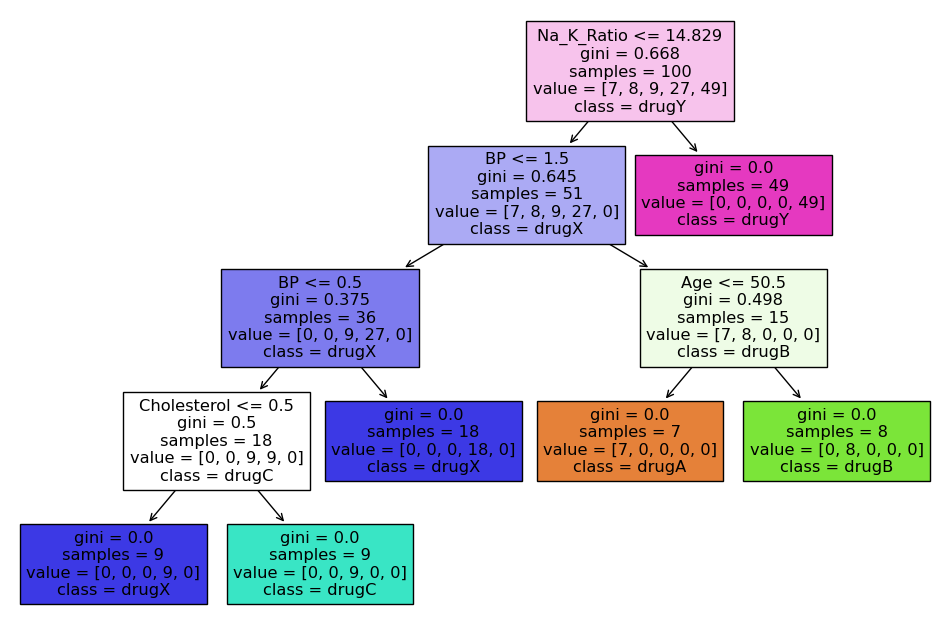

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Remove 'Sex_encoded', 'Na', and 'K' features
X_train_filtered = X_train.drop(columns=['Sex', 'Na', 'K'])

# Train the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_filtered, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X_train_filtered.columns, class_names=drug_classes, filled=True)
plt.show()


In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate on training set
y_train_pred = tree_model.predict(X_train_filtered)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=drug_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Evaluate on testing set
X_test_filtered = X_test.drop(columns=['Sex', 'Na', 'K'])
y_test_pred = tree_model.predict(X_test_filtered)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTesting Set Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=drug_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Training Set Metrics:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         8
       drugC       1.00      1.00      1.00         9
       drugX       1.00      1.00      1.00        27
       drugY       1.00      1.00      1.00        49

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 49]]

Testing Set Metrics:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        16
       drugB       1.00      1.00      1.00         8
       drugC       1.00      1.00      1.00         7
       drugX       1.00      1.00      1.00        27
       drug

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

# Train the logistic regression model with increased maximum iterations
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Display the logistic regression equation and coefficients
coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_[0]

print("Logistic Regression Equation:")
print("log(odds) = ", end="")
for i, (feature, coef) in enumerate(zip(X_train_filtered.columns, coefficients)):
    if i == 0:
        print(f"{coef:.2f} * {feature}", end="")
    else:
        print(f" + {coef:.2f} * {feature}", end="")
print(f" + {intercept:.2f}")


Logistic Regression Equation:
log(odds) = -0.56 * Age + 1.68 * BP + -0.20 * Cholesterol + -1.00 * Na_K_Ratio + -1.14


In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training set
y_train_pred = logistic_model.predict(X_train_scaled)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")

# Print classification report on the training set
print("Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=drug_classes))

# Print confusion matrix on the training set
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Make predictions on the testing set
y_test_pred = logistic_model.predict(X_test_scaled)

# Calculate accuracy on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTesting Set Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")

# Print classification report on the testing set
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=drug_classes))

# Print confusion matrix on the testing set
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Training Set Metrics:
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      0.86      0.92         7
       drugB       1.00      1.00      1.00         8
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.85      0.92        27
       drugY       0.91      1.00      0.95        49

    accuracy                           0.95       100
   macro avg       0.98      0.94      0.96       100
weighted avg       0.95      0.95      0.95       100

Confusion Matrix:
[[ 6  0  0  0  1]
 [ 0  8  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 23  4]
 [ 0  0  0  0 49]]

Testing Set Metrics:
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        16
       drugB       0.89      1.00      0.94         8
       drugC       1.00      1.00      1.00         7
       drugX       1.00      0.96      0.98        27
       drug